In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import math
import json

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

def running_average(arr):
    running_sum = 0
    running_avg = []

    for i, num in enumerate(arr):
        running_sum += num
        avg = running_sum / (i + 1)  # Calculate the running average
        running_avg.append(avg)

    return running_avg

In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-23/#068_CalibReadoutPhotonStat_23-32-35/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#002_CalibReadoutPhotonStat_00-22-01/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#003_CalibReadoutPhotonStat_00-30-50/CalibReadoutPhotonStatObject_sig_set.dat'
# dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#004_CalibReadoutPhotonStat_00-47-47/CalibReadoutPhotonStatObject_sig_set.dat'

sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=20, plot_hist_every=4, binwidth=1, ifDataSavedAsCountRate=True)

In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#004_CalibReadoutPhotonStat_00-47-47/CalibReadoutPhotonStatObject_sig_set.dat'
sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=60, plot_hist_every=20, binwidth=0, ifDataSavedAsCountRate=True)


In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#007_CalibReadoutPhotonStat_11-33-46/CalibReadoutPhotonStatObject_sig_set.dat'
sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=60, binwidth=1, plot_hist_every=10, ifDataSavedAsCountRate=False)

In [ ]:
for i in range(5,15):
    fig,ax = plt.subplots(figsize=(2.5,2.5))
    ax.hist(sig[i], bins=bins1DArray, edgecolor='black')
    ax.set_xlabel(r"Count")
    ax.set_ylabel(r"Probability")
    ax.set_title(r"$\tau$ = " + str(np.round(yplot[i]/1e6,2)) + " ms - signal")


In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#008_CalibReadoutPhotonStat_15-38-54/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#009_CalibReadoutPhotonStat_16-29-44/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#010_CalibReadoutPhotonStat_17-42-46/CalibReadoutPhotonStatObject_sig_set.dat'

sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=50, binwidth=1, plot_hist_every=1, ifDataSavedAsCountRate=False)


In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-24/#012_CalibReadoutPhotonStat_19-46-34/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-25/#001_CalibReadoutPhotonStat_00-20-11/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-25/#002_CalibReadoutPhotonStat_02-09-05/CalibReadoutPhotonStatObject_sig_set.dat'

sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=50, binwidth=1, plot_hist_every=3, ifDataSavedAsCountRate=False, ifLogColor=True)


In [ ]:
i = 0; num_of_iter_same_tau = len(xplot)
fig,ax = plt.subplots()
ax.hist(sig[i], bins=bins1DArray, edgecolor='black', density=True)
ax.set_xlabel(r"Count")
ax.set_ylabel(r"Probability")
ax.set_title(r"$\tau$ = " + str(np.round(yplot[i]/1e6,2)) + ". Signal. " + str(np.round(num_of_iter_same_tau/1e5,1)) + "e5 iters", 
                         fontsize=10)
ax.set_xlim((0,50))
# ax.set_ylim((0,0.00002))

In [ ]:
binsMidPoint = (bins1DArray[0:-1] + bins1DArray[1:])/2
binPlot, Yplot = np.meshgrid(binsMidPoint,yplot)

# Create a logarithmic color scale
norm = colors.LogNorm(vmin=hist2DArray_sig.min()+0.1, vmax=hist2DArray_sig.max())

fig,ax = plt.subplots()
plot = ax.pcolormesh(binPlot, Yplot/1e3, hist2DArray_sig, cmap='inferno', norm=norm)
ax.set_xlabel(r"Count")
ax.set_ylabel(r"Readout time ($\mu$s)")
ax.set_title("Histogram of counts - signal")
fig.colorbar(plot, orientation='vertical')


In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-25/#005_CalibReadoutPhotonStat_11-48-36/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-25/#006_CalibReadoutPhotonStat_12-39-04/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-25/#008_CalibReadoutPhotonStat_15-45-47/CalibReadoutPhotonStatObject_sig_set.dat'

sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=50, binwidth=1, plot_hist_every=1, 
    ifDataSavedAsCountRate=False, ifLogColor=True)


In [ ]:
i = 1; num_of_iter_same_tau = len(xplot)
fig,ax = plt.subplots()
ax.hist(sig[i], bins=bins1DArray, edgecolor='black', density=True)
ax.set_xlabel(r"Count")
ax.set_ylabel(r"Probability")
ax.set_title(r"$\tau$ = " + str(np.round(yplot[i]/1e6,2)) + ". Signal. " + str(np.round(num_of_iter_same_tau/1e5,1)) + "e5 iters", 
                         fontsize=10)
# ax.set_xlim((600,900))
# ax.set_xlim((750,1250))
# ax.set_xlim((1000,1600))

# ax.set_xlim((0,100))
ax.set_ylim((0,0.00002))

In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-25/#011_CalibReadoutPhotonStat_16-48-28/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-26/#008_CalibReadoutPhotonStat_12-28-55/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-26/#009_CalibReadoutPhotonStat_12-45-16/CalibReadoutPhotonStatObject_sig_set.dat'

sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=50, binwidth=1, plot_hist_every=1, 
    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=True)


(0.0, 2e-05)

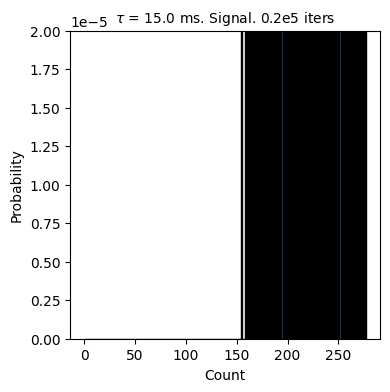

In [16]:
i = 0; num_of_iter_same_tau = len(xplot)
fig,ax = plt.subplots(figsize=(4,4))
# fig,ax = plt.subplots()
ax.hist(sig[i], bins=bins1DArray, edgecolor='black', density=True)
ax.set_xlabel(r"Count")
ax.set_ylabel(r"Probability")
ax.set_title(r"$\tau$ = " + str(np.round(yplot[i]/1e6,2)) + " ms. Signal. " + str(np.round(num_of_iter_same_tau/1e5,1)) + "e5 iters", 
                         fontsize=10)
# ax.set_xlim((600,900))
# ax.set_xlim((750,1250))
# ax.set_xlim((1000,1600))

# ax.set_xlim((120,300))
ax.set_ylim((0,0.00002))

In [ ]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-26/#010_CalibReadoutPhotonStat_13-27-52/CalibReadoutPhotonStatObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-26/#011_CalibReadoutPhotonStat_13-51-01/CalibReadoutPhotonStatObject_sig_set.dat'

sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
    dataFilename, num_of_bins=50, binwidth=10, plot_hist_every=5000, 
    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,
    ifRealTimeMonitor=True, num_of_iter=1000)


Text(0, 0.5, 'Total counts (c/1000 iters)')

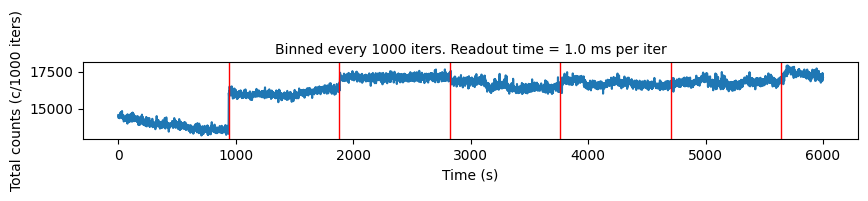

In [44]:
num_of_pb_iter = 1000
readout_time_per_iter_ns = 1e6
time_per_iter_second = num_of_pb_iter*readout_time_per_iter_ns/1e9

xplot = np.arange(len(yplot))*time_per_iter_second
yplot = np.sum(sig,axis=1)
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(xplot, yplot)
for i in range (1,7):
    ax.axvline(x=941*i, ymin=0, ymax = 1, color='red', linewidth=1)
ax.set_xlabel(r"Time (s)")
ax.set_title(r"Binned every " + str(num_of_pb_iter) + " iters. Readout time = " 
              + str(readout_time_per_iter_ns/1e6) + " ms per iter", fontsize=10)
ax.set_ylabel("Total counts (c/1000 iters)")
# ax.set_xlim((0,1000))


[9.12007529e-02 1.46076658e-02 1.93926082e+02]
[4.59271401e-03 2.71396872e-03 2.16347546e+01]


5.156603942480745

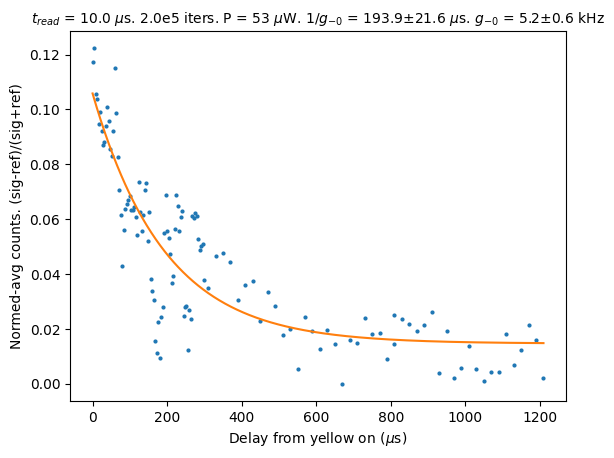

In [28]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-28/#001_CalibYellowIonizeRate_02-11-33/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-31/#014_CalibYellowIonizeRate_15-20-14/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-05-31/#016_CalibYellowIonizeRate_21-18-14/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-01/#002_CalibYellowIonizeRate_10-55-15/CalibYellowIonizeRateObject_sig_set.dat'

x, sig, ref = dr.readDataNoPlot(dataFilename)
x = np.array(x)/1e3; sig = np.array(sig); ref = np.array(ref)
if math.isnan(sig[-1]): 
    x = x[0:-1]; sig = sig[0:-1]; ref = ref[0:-1]
# y = sig
y = (sig-ref)/(sig+ref)

#################################
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-01/#004_CalibYellowIonizeRate_15-53-50/CalibYellowIonizeRateObject_sig_set.dat'

x2, sig2, ref2 = dr.readDataNoPlot(dataFilename)
x2 = np.array(x2)/1e3; sig2 = np.array(sig2); ref2 = np.array(ref2)
if math.isnan(sig2[-1]): 
    x2 = x2[0:-1]; sig2 = sig2[0:-1]; ref2 = ref2[0:-1]
# y2 = sig2
y2 = (sig2-ref2)/(sig2+ref2)

x = np.concatenate((x,x2)); y = np.concatenate((y,y2))

#################################
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-02/#002_CalibYellowIonizeRate_12-23-37/CalibYellowIonizeRateObject_sig_set.dat'

x3, sig3, ref3 = dr.readDataNoPlot(dataFilename)
x3 = np.array(x3)/1e3; sig3 = np.array(sig3); ref3 = np.array(ref3)
if math.isnan(sig3[-1]): 
    x3 = x3[0:-1]; sig3 = sig3[0:-1]; ref3 = ref3[0:-1]
# y3 = sig3
y3 = (sig3-ref3)/(sig3+ref3)

x = np.concatenate((x,x3)); y = np.concatenate((y,y3))

###########################################

read_duration = 10e3; power = 53; iters = 2e5

fig,ax = plt.subplots()
ax.plot(x,y, 'o', markersize=2)
ax.set_xlabel("Delay from yellow on ($\mu$s)")
ax.set_ylabel("Normed-avg counts. (sig-ref)/(sig+ref)")
xfit, yfit, popt, perr = dr.fitDecay(x, y, guess=(0.15,0.03,1))
ax.plot(xfit, yfit,)
ax.set_title("$t_{read}$ = %.1f $\mu$s. %.1fe5 iters. P = %.0f $\mu$W. 1/$g_{-0}$ = %.1f$\pm$%.1f $\mu$s. $g_{-0}$ = %.1f$\pm$%.1f kHz" %
             (read_duration/1e3, iters/1e5, power, popt[2], perr[2], 1000/popt[2], 1000*(perr[2]/popt[2]**2)), fontsize=10)
print(popt)
print(perr)
1/popt[2]*1000


[5.05558691e-01 2.22945135e-02 3.81456672e+03]
[3.81309889e-02 1.41377635e-02 5.90463096e+02]
55.98885793871866


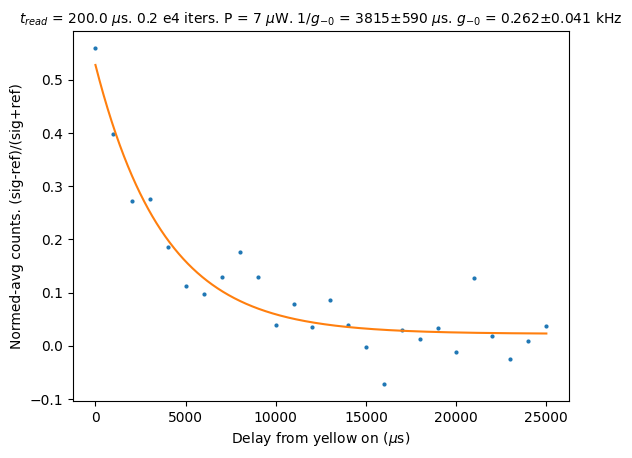

In [45]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-02/#004_CalibYellowIonizeRate_22-11-19/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-03/#001_CalibYellowIonizeRate_21-52-22/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#003_CalibYellowIonizeRate_21-03-15/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#004_CalibYellowIonizeRate_21-17-59/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#005_CalibYellowIonizeRate_21-43-12/CalibYellowIonizeRateObject_sig_set.dat'
# dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#006_CalibYellowIonizeRate_22-14-25/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#010_CalibYellowIonizeRate_22-41-18/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#011_CalibYellowIonizeRate_23-10-47/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#012_CalibYellowIonizeRate_23-32-17/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-04/#013_CalibYellowIonizeRate_23-44-05/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-05/#001_CalibYellowIonizeRate_00-01-15/CalibYellowIonizeRateObject_sig_set.dat'
# dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-05/#002_CalibYellowIonizeRate_01-30-02/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-05/#034_CalibYellowIonizeRate_12-17-45/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-08/#028_CalibYellowIonizeRate_02-12-45/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-14/#018_CalibYellowIonizeRate_21-43-52/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-21/#005_CalibYellowIonizeRate_19-10-59/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-21/#006_CalibYellowIonizeRate_19-40-27/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-22/#007_CalibYellowIonizeRate_16-25-56/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-06-26/#001_CalibYellowIonizeRate_12-07-03/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-20/#013_CalibYellowIonizeRate_20-59-12/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-21/#002_CalibYellowIonizeRate_06-16-03/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-21/#005_CalibYellowIonizeRate_12-51-55/CalibYellowIonizeRateObject_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-27/#324_CalibYellowIonizeRate_13-57-31/CalibYellowIonizeRateObject_sig_set.dat'

x, sig, ref = dr.readDataNoPlot(dataFilename)
x = np.array(x)/1e3; sig = np.array(sig); ref = np.array(ref)
if math.isnan(sig[-1]): 
    x = x[0:-1]; sig = sig[0:-1]; ref = ref[0:-1]
y = (sig-ref)/(sig+ref)
# y = sig

# x = x[0:27]
# y = y[0:27]

read_duration = 200e3; power = 7.4; iters = 2e3

fig,ax = plt.subplots()
# ax.plot(x,sig)
# ax.plot(x,ref)
ax.plot(x,y, 'o', markersize=2)
# ax.axhline(y = 0.0169, xmin=0, xmax = 1, color='red', linewidth=1)
ax.set_xlabel("Delay from yellow on ($\mu$s)")
ax.set_ylabel("Normed-avg counts. (sig-ref)/(sig+ref)")
xfit, yfit, popt, perr = dr.fitDecay(x, y, guess=(0.03,-0.03,6e4))
ax.plot(xfit, yfit,)
ax.set_title("$t_{read}$ = %.1f $\mu$s. %.1f e4 iters. P = %.0f $\mu$W. 1/$g_{-0}$ = %.0f$\pm$%.0f $\mu$s. $g_{-0}$ = %.3f$\pm$%.3f kHz" %
             (read_duration/1e3, iters/1e4, power, popt[2], perr[2], 1000/popt[2], 1000*(perr[2]/popt[2]**2)), fontsize=10)
print(popt)
print(perr)
1/popt[2]*1000
print(max(y*100))

[0.34168336673346694, 0.3429859719438878, 0.34168336673346694, 0.34133266533066137, 0.34380761523046094, 0.34592518370073483, 0.3471514457486401, 0.3479959919839679, 0.3483633934535738, 0.3489579158316633, 0.34986336308981597, 0.34951569806279226, 0.3501926930784646, 0.3491125107357572, 0.3483500334001336, 0.34792084168336673, 0.3476128728044324, 0.34714985526608777, 0.34665119713110437, 0.3464529058116233, 0.3463498425422274, 0.34659318637274555, 0.3465539775202579, 0.3462007348029392, 0.3460681362725451, 0.3460536457530446, 0.34641134120092043, 0.3459633552819926, 0.3459056043120725, 0.34555778223112904, 0.34581420906328797, 0.34554734468937887, 0.34508410760915786, 0.34424731816574333, 0.3440939020898942, 0.34344800712536194, 0.34275578183393823, 0.3420419786942307, 0.342222907353168, 0.341928857715431, 0.3414683024585758, 0.34153545185609324, 0.34094701029966923, 0.3402623428675534, 0.33974615898463606, 0.33936568789753435, 0.338992879375773, 0.33863142952571823, 0.3379166496257823

Text(0, 0.5, 'Difference in counts (c)')

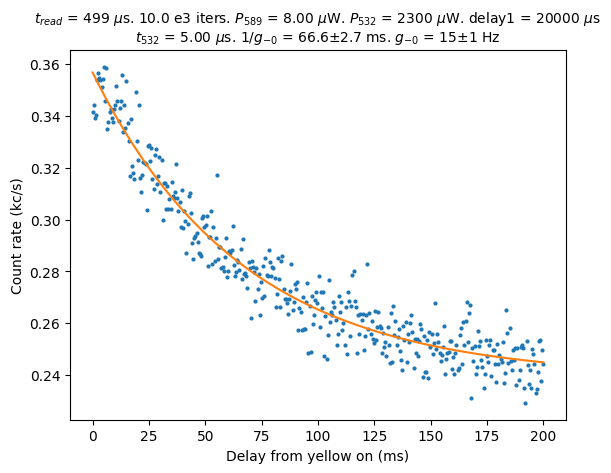

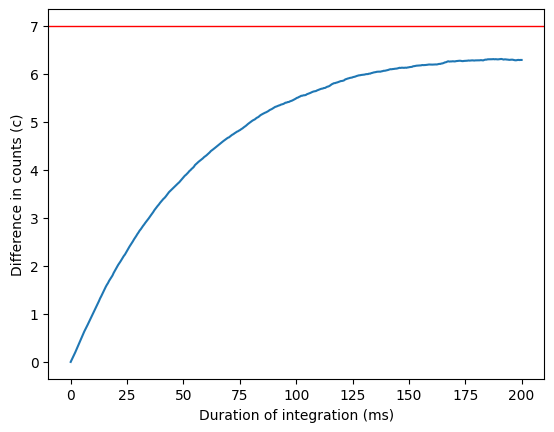

In [275]:
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-27/#362_CalibYellowIonizeRate2_16-36-37/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-27/#367_CalibYellowIonizeRate2_19-16-49/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-27/#368_CalibYellowIonizeRate2_19-27-45/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-29/#104_CalibYellowIonizeRate2_15-46-39/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-29/#140_CalibYellowIonizeRate2_21-38-54/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-31/#002_CalibYellowIonizeRate2_11-57-08/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-31/#006_CalibYellowIonizeRate2_13-00-46/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-31/#061_CalibYellowIonizeRate2_21-46-45/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-07-31/#062_CalibYellowIonizeRate2_22-19-06/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-01/#054_CalibYellowIonizeRate2_11-08-19/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-01/#055_CalibYellowIonizeRate2_11-25-00/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-01/#093_CalibYellowIonizeRate2_17-07-15/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#016_CalibYellowIonizeRate2_02-32-30/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#017_CalibYellowIonizeRate2_03-09-50/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#094_CalibYellowIonizeRate2_17-28-58/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#095_CalibYellowIonizeRate2_17-59-27/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#096_CalibYellowIonizeRate2_18-29-39/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#097_CalibYellowIonizeRate2_19-03-44/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-02/#016_CalibYellowIonizeRate2_02-32-30/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-03/#029_CalibYellowIonizeRate2_14-37-25/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-04/#023_CalibYellowIonizeRate2_17-06-04/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-04/#048_CalibYellowIonizeRate2_22-06-55/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-04/#051_CalibYellowIonizeRate2_22-54-30/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-05/#009_CalibYellowIonizeRate2_01-15-39/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-07/#008_CalibYellowIonizeRate2_03-38-38/CalibYellowIonizeRate2Object_sig_set.dat'
dataFilename = 'C:/Users/lukin2dmaterials/data/2023-08-07/#008_CalibYellowIonizeRate2_03-38-38/CalibYellowIonizeRate2Object_sig_set.dat'

x, sig = dr.readDataNoRef(dataFilename)
x = np.array(x)/1e6; sig = np.array(sig)
if math.isnan(sig[-1]): 
    x = x[0:-1]; sig = sig[0:-1]

x = np.linspace(0, x[-1], len(x))
y = sig

read_duration = 499e3; power = 8; iters = 10e3; power532 = 2300; delay1 = 20e6; t532 = 5e3
y = y/(read_duration/1e6)
# x = x[7:]; y = y[7:]

y_avg = running_average(y)

fig,ax = plt.subplots()
ax.plot(x,y, 'o', markersize=2)
# ax.axhline(y = 0.0169, xmin=0, xmax = 1, color='red', linewidth=1)
ax.set_xlabel("Delay from yellow on (ms)")
ax.set_ylabel("Count rate (kc/s)")
xfit, yfit, popt, perr = dr.fitDecay(x, y, guess=(0.03,-0.03,6e4)) 
ax.plot(xfit, yfit,)
s1 = "$t_{read}$ = %.0f $\mu$s. %.1f e3 iters. $P_{589}$ = %.2f $\mu$W. $P_{532}$ = %.0f $\mu$W. delay1 = %.0f $\mu$s" % (read_duration/1e3, iters/1e3, power, power532, delay1/1e3)
s2 = "$t_{532}$ = %.2f $\mu$s. 1/$g_{-0}$ = %.1f$\pm$%.1f ms. $g_{-0}$ = %.0f$\pm$%.0f Hz" %(t532/1e3, popt[2], perr[2], 1e3/popt[2], 1e3*(perr[2]/popt[2]**2))
ax.set_title(s1 + "\n" + s2, fontsize=10)
# ax.plot(x,y_avg, 'o', markersize=2)
print(popt)
print(perr)
1/popt[2]*1000
print(max(y*100))

fig, ax = plt.subplots()
ax.plot(x, (x*y_avg)-(x*yfit[-1]))
ax.axhline(y = 7, xmin=0, xmax = 1, color='red', linewidth=1)
# ax.plot(x, (x*yfit[-1]))
# ax.plot(x, ((x*y_avg)-(x*yfit[-1])) / (x*yfit[-1]))
ax.set_xlabel("Duration of integration (ms)")
ax.set_ylabel("Difference in counts (c)")
# ax.set_xlim((0,10))
# ax.set_ylim((0,5))

In [58]:
len(y)

31

In [ ]:
filename = 'C:/Users/lukin2dmaterials/data/2023-06-08/#043_CalibReadoutPhotonStat_18-15-15/snapshot.json'
f = open(filename)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json list
for k, v in data.items():
    if k != 'loop' and k!= 'arrays':
        print (k, v)


In [ ]:
# Repeat measuring ionization rates at the same power
days = np.linspace(21,21,1)
dataArr = []; gArr = []; err_gArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-07-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'CalibYellowIonizeRate' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 16 and idx <= 20:
                read_duration = 400e3; power = 18; iters = 2e3

                datafile = mainFolder + dataFolder +'/CalibYellowIonizeRateObject_sig_set.dat'

                x, sig, ref = dr.readDataNoPlot(datafile)
                x = np.array(x)/1e3; sig = np.array(sig); ref = np.array(ref)
                n = 31
                if len(sig) < n: 
                        print("Bad data: " + datafile)
                else:
                    if math.isnan(sig[-1]): 
                        x = x[0:-1]; sig = sig[0:-1]; ref = ref[0:-1]
                    xPlot = x
                    y = (sig-ref)/(sig+ref)
                    # y = sig-ref
                    y = sig
                    # x = x[0:21]
                    # y = y[0:21]
                    dataArr.append(y)

                    xfit, yfit, popt, perr = dr.fitDecay(x, y, guess=(0.3,0.03,100))
                    g = 1000/popt[2]; err_g = 1000*(perr[2]/popt[2]**2)
                    gArr.append(g); err_gArr.append(err_g)

                    if np.mod(idx,100) == 0:
                        fig,ax = plt.subplots()
                        ax.plot(x,y, 'o', markersize=2)
                        ax.set_xlabel("Delay from yellow on ($\mu$s)")
                        ax.set_ylabel("Normed-avg counts. (sig-ref)/(sig+ref)")
                        ax.plot(xfit, yfit,)
                        ax.set_title("$t_{read}$ = %.1f $\mu$s. %.1fe5 iters. P = %.0f $\mu$W. 1/$g_{-0}$ = %.0f$\pm$%.0f $\mu$s. $g_{-0}$ = %.2f$\pm$%.2f kHz" %
                                    (read_duration/1e3, iters/1e5, power, popt[2], perr[2], 1000/popt[2], 1000*(perr[2]/popt[2]**2)), fontsize=10)

dataArr = np.array(dataArr); gArr = np.array(gArr); err_gArr = np.array(err_gArr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(xPlot, y)
plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')
ax.set_xlabel("Delay from yellow on ($\mu$s)")
ax.set_ylabel(r"Iteration")


fig, ax = plt.subplots(figsize=(5,4))
plot1 = ax.errorbar(y, gArr, err_gArr, color='C0', label="Ionization rate", linestyle='', marker='.')

ax.set_xlabel(r"Iteration")
ax.set_ylabel(r"$g_{-0}$ (kHz)")
# ax.set_title(r"$I_{sat}$ = %.1f kc/s, $P_{sat}/A$ = %.2f $\times 10^9$ W/m$^{2}$" % (popt[0], popt[1]))

g_mean = np.sum(gArr/err_gArr**2)/np.sum(1/err_gArr**2)
err_gMean = np.sqrt(1/np.sum(1/err_gArr**2))
print("max = " + str(np.max(gArr + err_gArr)))
print("min = " + str(np.min(gArr - err_gArr)))
print("g_mean = " + str(g_mean))
print("err_gMean = " + str(err_gMean))
print(np.average(gArr))

firstY = np.max(dataArr, axis=1)*(1e6/read_duration)
print("max first count rate = "  + str(np.max(firstY)))
print("min first count rate = " + str(np.min(firstY)))
print("avg first count rate = " + str(np.average(firstY)))

max = 8.192754002793189
min = 1.931309137001751
g_mean = 5.858488966317869
err_gMean = 0.07248098647147792
5.7227489741099085
max first count rate = 0.83533801069072
min first count rate = 0.4578294866285677
avg first count rate = 0.6920989607806125


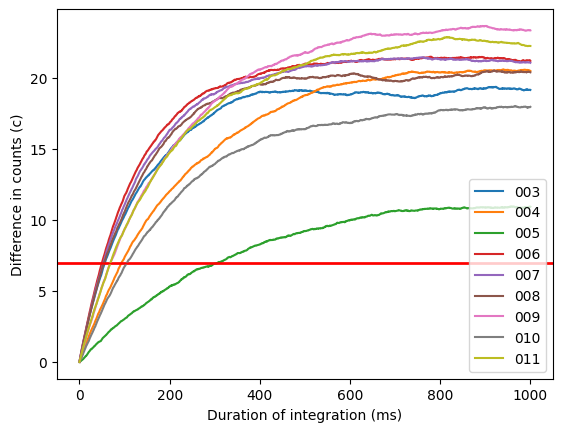

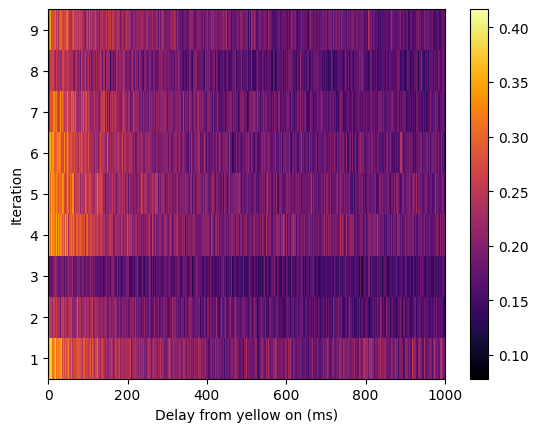

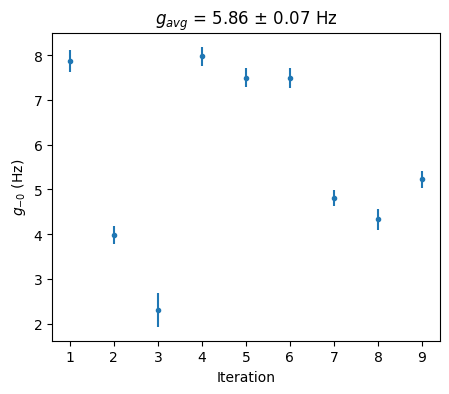

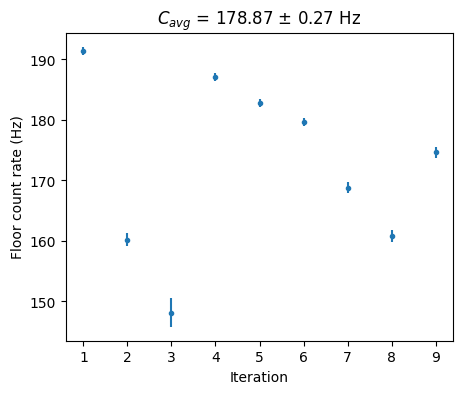

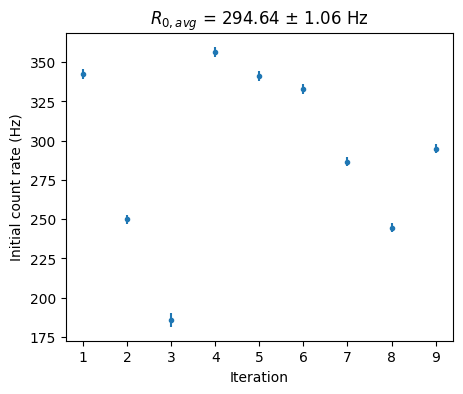

In [37]:
# Repeat measuring ionization rates at the same power
# days = np.linspace(5,6,2)
days = np.linspace(1,1, 1)
dataArr = []; gArr = []; err_gArr = []; cArr = []; err_cArr = []; r0Arr = []; err_r0Arr = []
fig2, ax2 = plt.subplots()
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-' + str(int(day)).zfill(2) + '/'
    # durations = np.array((50, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000))
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'CalibYellowIonizeRate2' in dataFolder:
            idx = int(dataFolder[1:4])
            # if (day == 6 and idx >= 1 and idx <= 56) or (day == 5 and idx >= 79):
            if idx >= 3 and idx <=11:
                read_duration = 499e3; power = 1.9; iters = 1e3; power532 = 55; delay1 = 5e6; t532 = 50e3 #durations[idx-7]
                datafile = mainFolder + dataFolder +'/CalibYellowIonizeRate2Object_sig_set.dat'

                x, sig = dr.readDataNoRef(datafile)
                x = np.array(x)/1e6; sig = np.array(sig)
                n = 1
                if len(sig) < n: 
                        print("Bad data: " + datafile)
                else:
                    if math.isnan(sig[-1]): 
                        x = x[0:-1]; sig = sig[0:-1]
                    x = np.linspace(0, x[-1], len(x))
                    xPlot = x
                    y = sig
                    y = y/(read_duration/1e6)
                    y_avg = running_average(y)
                    dataArr.append(y)

                    xfit, yfit, popt, perr = dr.fitDecay(x, y, guess=(0.3,0.03,100))
                    g = 1e3/popt[2]; err_g = 1e3*(perr[2]/popt[2]**2)
                    gArr.append(g); err_gArr.append(err_g)
                    cArr.append(1e3*popt[1]); err_cArr.append(1e3*perr[1])
                    r0Arr.append(yfit[0]*1e3); err_r0Arr.append(1e3*(perr[1]+perr[0]))

                    if np.mod(idx,1) == 0:
                        # fig,ax = plt.subplots()
                        # ax.plot(x,y, 'o', markersize=2)
                        # ax.set_xlabel("Delay from yellow on (ms)")
                        # ax.set_ylabel("Count rate (kc/s)")
                        # ax.plot(xfit, yfit,)
                        # s1 = "$t_{read}$ = %.0f $\mu$s. %.1f e3 iters. $P_{589}$ = %.2f $\mu$W. $P_{532}$ = %.0f $\mu$W. delay1 = %.1f ms" % (read_duration/1e3, iters/1e3, power, power532, delay1/1e6)
                        # s2 = "$t_{532}$ = %.2f $\mu$s. 1/$g_{-0}$ = %.1f$\pm$%.1f ms. $g_{-0}$ = %.1f$\pm$%.1f Hz. C = %.0f$\pm$%.0f c/s" %(t532/1e3, popt[2], perr[2], 1e3/popt[2], 1e3*(perr[2]/popt[2]**2), popt[1]*1e3, 1e3*perr[1])
                        # ax.set_title(s1 + "\n" + s2, fontsize=10)

                        ax2.plot(x, (x*y_avg)-(x*yfit[-1]), label=dataFolder[1:4])
                        ax2.axhline(y = 7, xmin=0, xmax = 1, color='red', linewidth=1)
                        ax2.set_xlabel("Duration of integration (ms)")
                        ax2.set_ylabel("Difference in counts (c)")
                        ax2.legend()
                        
dataArr = np.array(dataArr); gArr = np.array(gArr); err_gArr = np.array(err_gArr); 
cArr = np.array(cArr); err_cArr = np.array(err_cArr); r0Arr = np.array(r0Arr); err_r0Arr = np.array(err_r0Arr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(xPlot, y)
plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')
ax.set_xlabel("Delay from yellow on (ms)")
ax.set_ylabel(r"Iteration")

g_mean = np.sum(gArr/err_gArr**2)/np.sum(1/err_gArr**2)
err_gMean = np.sqrt(1/np.sum(1/err_gArr**2))
fig, ax = plt.subplots(figsize=(5,4))
plot1 = ax.errorbar(y, gArr, err_gArr, color='C0', label="Ionization rate", linestyle='', marker='.')
ax.set_xlabel(r"Iteration")
ax.set_ylabel(r"$g_{-0}$ (Hz)")
ax.set_title("$g_{avg}$ = %.2f $\pm$ %.2f Hz" % (g_mean, err_gMean))

c_mean = np.sum(cArr/err_cArr**2)/np.sum(1/err_cArr**2)
err_cMean = np.sqrt(1/np.sum(1/err_cArr**2))
fig, ax = plt.subplots(figsize=(5,4))
plot1 = ax.errorbar(y, cArr, err_cArr, color='C0', label="Floor count rate", linestyle='', marker='.')
ax.set_xlabel(r"Iteration")
ax.set_ylabel(r"Floor count rate (Hz)")
ax.set_title("$C_{avg}$ = %.2f $\pm$ %.2f Hz" % (c_mean, err_cMean))

r0_mean = np.sum(r0Arr/err_r0Arr**2)/np.sum(1/err_r0Arr**2)
err_r0Mean = np.sqrt(1/np.sum(1/err_r0Arr**2))
fig, ax = plt.subplots(figsize=(5,4))
plot1 = ax.errorbar(y, r0Arr, err_r0Arr, color='C0', label="Initial count rate", linestyle='', marker='.')
ax.set_xlabel(r"Iteration")
ax.set_ylabel(r"Initial count rate (Hz)")
ax.set_title("$R_{0,avg}$ = %.2f $\pm$ %.2f Hz" % (r0_mean, err_r0Mean))

print("max = " + str(np.max(gArr + err_gArr)))
print("min = " + str(np.min(gArr - err_gArr)))
print("g_mean = " + str(g_mean))
print("err_gMean = " + str(err_gMean))
print(np.average(gArr))

firstY = np.max(dataArr, axis=1)*(1e6/read_duration)
print("max first count rate = "  + str(np.max(firstY)))
print("min first count rate = " + str(np.min(firstY)))
print("avg first count rate = " + str(np.average(firstY)))

In [ ]:
firsts = []
for i in range(len(dataArr)):
    firsts.append(dataArr[i][0])
fig, ax = plt.subplots()
ax.plot(range(len(dataArr)), firsts)

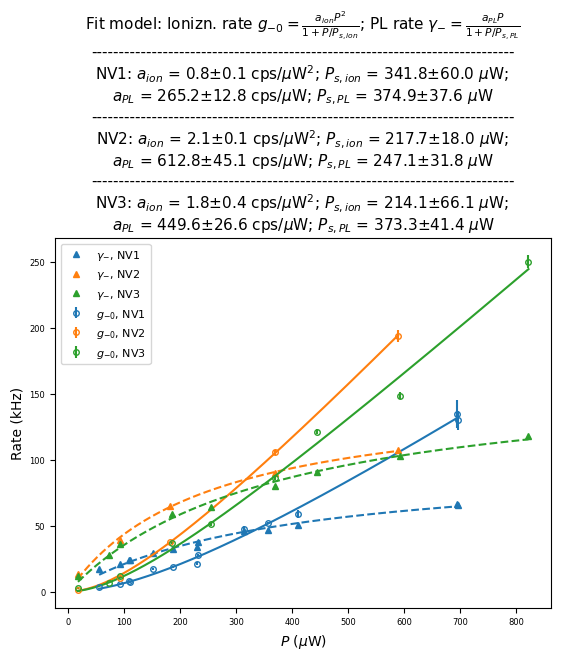

In [39]:
fig, ax = plt.subplots()

p = np.array((    55,  109, 230,  410,  696,   151,  232,  695,   313,  111,  357,  187,  92))
g = np.array((    3.3, 7.9, 21.1, 58.7, 129.9, 17.1, 27.5, 134.7, 47.2, 6.9,  52.2, 18.6, 6))
err_g = np.array((0.2, 0.2, 1.2,  2.9,  7.1,   0.9,  1.3,  10.5,  2.2,  0.4,  0.5,  0.6,  0.2))
gamma = np.array((5.1, 8.5, 11.6, 15.9, 16.8,  11.4, 13.8, 16,    16.9, 7.9,  16.1, 12.2, 7.2)) # sig-ref
gamma = np.array((17, 23.6, 34.1, 50.2, 65.8,  29.6, 37.6, 66.1,  45.9, 23.6, 46.7, 32.3, 20.8)) # sig

p2 = np.array((    589,   182,  92,   16.5,  369))
g2 = np.array((    194,   37.5, 10.6, 1.01,  105.7))
err_g2 = np.array((4.7,   0.4,  0.3,  0.13,  1.8))
gamma2 = np.array((26,    30.4, 18.2, 3.24,  31.9)) # sig-ref
gamma2 = np.array((107.3, 65.1, 39.3, 13.66, 89.7)) # sig

# p3 = np.array((    590,   )) after changing collimation
# g3 = np.array((    199.4,   ))
# err_g3 = np.array((5.2,   ))
# gamma3 = np.array((26.4,    )) # sig-ref
# gamma3 = np.array((101.9, )) # sig

p3 = np.array((    592,   186,  93,   17.2,  369,  822,   254,  444,   72.5, ))
g3 = np.array((    148.5, 36.8, 11.5, 2.62,  86,   250.2, 50.9, 121.3, 6.86, ))
err_g3 = np.array((2.5,   0.6,  0.1,  0.5,   1.7,  5.1,   0.9,  1.8,   0.16, ))
gamma3 = np.array((22.9,  25.1, 16,   2.75,  24.5, 18.9,  24.6, 26.5,  11.5, )) # sig-ref 
gamma3 = np.array((102.6, 58.6, 36.3, 12.12, 79.8, 118,   64.4, 91,    27.8, )) # sig

popt, pcov = curve_fit(dr.saturationQuad, p, g)
perr = np.sqrt(np.diag(pcov))
pfit = np.linspace(p.min(), p.max(), 1001)
gfit = dr.saturationQuad(pfit, *popt)
a_str = "NV1: $a_{ion}$ = %.1f$\pm$%.1f cps/$\mu$W$^2$; " % (popt[0]*1000, perr[0]*1000)
Ps_str = "$P_{s,ion}$ = %.1f$\pm$%.1f $\mu$W; " % (popt[1], perr[1])

popt2, pcov2 = curve_fit(dr.saturation, p, gamma)
perr2 = np.sqrt(np.diag(pcov2))
pfit = np.linspace(p.min(), p.max(), 1001)
gammafit = dr.saturation(pfit, *popt2)
aPL_str = "$a_{PL}$ = %.1f$\pm$%.1f cps/$\mu$W; "  % (popt2[0]*1000/popt2[1], 
                                                      np.abs(1000*(popt2[0]*perr2[1]-popt2[1]*perr2[0]))/popt2[1]**2)
PsPL_str = "$P_{s,PL}$ = %.1f$\pm$%.1f $\mu$W" % (popt2[1], perr2[1])

popt3, pcov3 = curve_fit(dr.saturationQuad, p2, g2)
perr3 = np.sqrt(np.diag(pcov3))
pfit3 = np.linspace(p2.min(), p2.max(), 1001)
gfit3 = dr.saturationQuad(pfit3, *popt3)
a_str2 = "NV2: $a_{ion}$ = %.1f$\pm$%.1f cps/$\mu$W$^2$; " % (popt3[0]*1000, perr3[0]*1000)
Ps_str2 = "$P_{s,ion}$ = %.1f$\pm$%.1f $\mu$W; " % (popt3[1], perr3[1])

popt4, pcov4 = curve_fit(dr.saturation, p2, gamma2)
perr4 = np.sqrt(np.diag(pcov4))
pfit4 = np.linspace(p2.min(), p2.max(), 1001)
gammafit4 = dr.saturation(pfit4, *popt4)
aPL_str2 = "$a_{PL}$ = %.1f$\pm$%.1f cps/$\mu$W; "  % (popt4[0]*1000/popt4[1], 
                                                      np.abs(1000*(popt4[0]*perr4[1]-popt4[1]*perr4[0]))/popt4[1]**2)
PsPL_str2 = "$P_{s,PL}$ = %.1f$\pm$%.1f $\mu$W" % (popt4[1], perr4[1])

popt5, pcov5 = curve_fit(dr.saturationQuad, p3, g3)
perr5 = np.sqrt(np.diag(pcov5))
pfit5 = np.linspace(p3.min(), p3.max(), 1001)
gfit5 = dr.saturationQuad(pfit5, *popt5)
a_str3 = "NV3: $a_{ion}$ = %.1f$\pm$%.1f cps/$\mu$W$^2$; " % (popt5[0]*1000, perr5[0]*1000)
Ps_str3 = "$P_{s,ion}$ = %.1f$\pm$%.1f $\mu$W; " % (popt5[1], perr5[1])

popt6, pcov6 = curve_fit(dr.saturation, p3, gamma3)
perr6 = np.sqrt(np.diag(pcov6))
pfit6 = np.linspace(p3.min(), p3.max(), 1001)
gammafit6 = dr.saturation(pfit6, *popt6)
aPL_str3 = "$a_{PL}$ = %.1f$\pm$%.1f cps/$\mu$W; "  % (popt6[0]*1000/popt6[1], 
                                                      np.abs(1000*(popt6[0]*perr6[1]-popt6[1]*perr6[0]))/popt6[1]**2)
PsPL_str3 = "$P_{s,PL}$ = %.1f$\pm$%.1f $\mu$W" % (popt6[1], perr6[1])

markersize = 4; labelsize=6
plot1 = ax.errorbar(p,g,err_g,color='C0', label="$g_{-0}$, NV1", linestyle='', marker='o', markerfacecolor='none', markersize=markersize)
plot2 = ax.plot(p,gamma, '^', color='C0', label="$\gamma_{-}$, NV1",markersize=markersize)
plot3 = ax.plot(pfit, gfit, color='C0')
plot4 = ax.plot(pfit, gammafit, color='C0', linestyle='--')

plot5 = ax.errorbar(p2, g2, err_g2, color='C1', label="$g_{-0}$, NV2", linestyle='', marker='o', markerfacecolor='none', markersize=markersize)
plot6 = ax.plot(p2, gamma2, '^', color='C1', label="$\gamma_{-}$, NV2",markersize=markersize)
plot7 = ax.plot(pfit3, gfit3, color='C1')
plot8 = ax.plot(pfit4, gammafit4, color='C1', linestyle='--')

plot9 = ax.errorbar(p3, g3, err_g3, color='C2', label="$g_{-0}$, NV3", linestyle='', marker='o', markerfacecolor='none', markersize=markersize)
plot10 = ax.plot(p3, gamma3, '^', color='C2', label="$\gamma_{-}$, NV3",markersize=markersize)
plot11 = ax.plot(pfit5, gfit5, color='C2', )
plot12 = ax.plot(pfit6, gammafit6, color='C2', linestyle='--')

# ax.set_yscale('log')
# ax.set_xscale('log')

plt.tick_params(axis='x', which='minor', labelsize=labelsize)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.tick_params(axis='x', which='major', labelsize=labelsize)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.tick_params(axis='y', which='minor', labelsize=labelsize)
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.tick_params(axis='y', which='major', labelsize=labelsize)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"Rate (kHz)")
ax.set_title(r"Fit model: Ionizn. rate $g_{-0} = \frac{a_{ion} P^2}{1+P/P_{s,ion}}$; " + 
             r"PL rate $\gamma_{-} = \frac{a_{PL} P}{1+P/P_{s,PL}}$"+"\n"+ "-----------------------------------------------------------------------------" +"\n" +
             a_str + Ps_str + "\n" + aPL_str + PsPL_str +"\n" + "-----------------------------------------------------------------------------" +"\n" +
             a_str2 + Ps_str2 + "\n" + aPL_str2 + PsPL_str2 +"\n" + "-----------------------------------------------------------------------------" +"\n" +
             a_str3 + Ps_str3 + "\n" + aPL_str3 + PsPL_str3, fontsize=11)
ax.legend(fontsize=8)